# Simple Perceptron

## Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import sys
sys.path.append('..')

from data import MNIST
from multilayer_perceptron import MLP
from multilayer_perceptron.layers import InputLayer, OutputLayer
from multilayer_perceptron.activations import step
from multilayer_perceptron.costs import mean_square_cost

## Building dataset

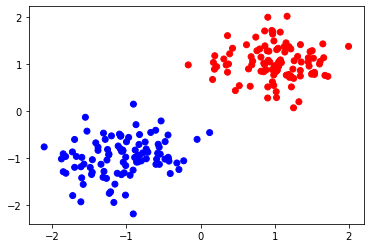

In [3]:
centers = ((-1, -1), (1, 1))
spread = 0.4
samples = 200
points = np.concatenate([np.random.normal(center, spread, (samples//2, 2)) for center in centers])
classes = np.concatenate([samples//2 * [-1], samples//2 * [1]])
train_data = (points, classes.reshape((samples, 1)))
plt.scatter(points[:, 0], points[:, 1], c=classes, cmap=plt.cm.bwr)
plt.show()

## Neural network

In [6]:
mlp = MLP()
mlp.add(InputLayer(2))
mlp.add(OutputLayer(1, step, mean_square_cost))
mlp.initialize_random_weights()
mlp.fit(
  train_data=train_data,
  epochs=100,
  learning_rate=0.001,
  batch_size=10
)

Epoch: 99/100	Train: 0.250 | 1.000

## Visualization

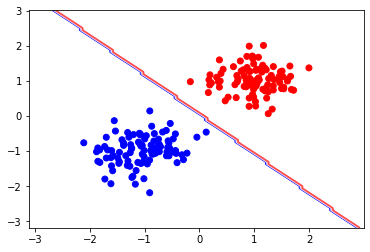

In [7]:
num_of_samples = 100

xmin, ymin = np.min(points, axis=0) - 1
xmax, ymax = np.max(points, axis=0) + 1

x = np.linspace(xmin, xmax, num_of_samples)
y = np.linspace(ymin, ymax, num_of_samples)

X, Y = np.meshgrid(x, y)
XY = np.column_stack([X.ravel(), Y.ravel()])

mlp.feedfoward(XY)
Z = mlp.layers[-1].output.reshape((num_of_samples, num_of_samples))

plt.scatter(points[:, 0], points[:, 1], c=classes, cmap=plt.cm.bwr)
plt.contour(X, Y, Z, cmap=plt.cm.bwr)
plt.show()